## **<center>D213 NLM2 TASK 2: SENTIMENT ANALYSIS USING NEURAL NETWORKS<center>** 

Julia Amanda Terzin  
ID:009968680  
Mentor: Jared Knepp    
1.877.435.7948 Ext. 6604     
jared.knepp@wgu.edu   
September 29, 2022

### Part I: Research Question

#### A.  Describe the purpose of this data analysis by doing the following:

##### A.1. Summarize one research question that you will answer using neural network models and NLP techniques. Be sure the research question is relevant to a real-world organizational situation and sentiment analysis captured in your chosen dataset.

Can we use Natural Language Processing (NLP) and Networks to analyze customer reviews and interpret sentiment? 

##### A.2.  Define the objectives or goals of the data analysis. Be sure the objectives or goals are reasonable within the scope of the research question and are represented in the available data.

The goal of the analysis is to predict positive or negative sentiments from customer reviews.

#### A.3.  Identify a type of neural network capable of performing a text classification task that can be trained to produce useful predictions on text sequences on the selected data set.

Recurrent Neural Networks (RNN) are deep learning algorithms that work best with sequential data like time series and text data. It uses previous input in its “memory” to predict subsequent values. (Kalita, 2022)

#### Part II: Data Preparation

##### 1. Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from collections import  Counter
from collections import defaultdict
from collections import OrderedDict

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from textblob import TextBlob
from spellchecker import SpellChecker
from textblob import Word

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D, GlobalAveragePooling1D
from tensorflow.keras.layers import Embedding, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from keras.backend import clear_session

from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint

#import fasttext
import contractions

from pylab import rcParams

import emot
import emoji
from emoji import UNICODE_EMOJI

import regex
nltk.download('punkt')
from nltk.text import Text
import string, re
from keras.models import load_model

from sklearn.feature_extraction.text import CountVectorizer

plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from platform import python_version
print('python version used for this analysis is:', python_version())

python version used for this analysis is: 3.8.8


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jater\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##### 2. Load data 

In [2]:
# read text file into pandas DataFrame
amazon = pd.read_csv("amazon_cells_labelled.txt", sep='\t', header=None, names = ['Review', 'Score'])
amazon['Source'] = 'amazon'
amazon

,Review,Score,Source
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
995,The screen does get smudged easily because it ...,0,amazon
996,What a piece of junk.. I lose more calls on th...,0,amazon
997,Item Does Not Match Picture.,0,amazon
998,The only thing that disappoint me is the infra...,0,amazon


In [3]:
# read text file into pandas DataFrame
yelp = pd.read_csv("yelp_labelled.txt", sep='\t', header=None, names = ['Review', 'Score'])
yelp['Source'] = 'yelp'
yelp

,Review,Score,Source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp
...,...,...,...
995,I think food should have flavor and texture an...,0,yelp
996,Appetite instantly gone.,0,yelp
997,Overall I was not impressed and would not go b...,0,yelp
998,"The whole experience was underwhelming, and I ...",0,yelp


In [4]:
# read text file into pandas DataFrame
imdb = pd.read_csv("imdb_labelled.txt", sep='  \t', header=None, names = ['Review', 'Score'])
imdb['Source'] = 'imdb'
imdb

,Review,Score,Source
0,"A very, very, very slow-moving, aimless movie ...",0,imdb
1,Not sure who was more lost - the flat characte...,0,imdb
2,Attempting artiness with black & white and cle...,0,imdb
3,Very little music or anything to speak of.,0,imdb
4,The best scene in the movie was when Gerardo i...,1,imdb
...,...,...,...
995,I just got bored watching Jessice Lange take h...,0,imdb
996,"Unfortunately, any virtue in this film's produ...",0,imdb
997,"In a word, it is embarrassing.",0,imdb
998,Exceptionally bad!,0,imdb


In [5]:
df = pd.concat([amazon, yelp, imdb], ignore_index= True)
df

,Review,Score,Source
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
2995,I just got bored watching Jessice Lange take h...,0,imdb
2996,"Unfortunately, any virtue in this film's produ...",0,imdb
2997,"In a word, it is embarrassing.",0,imdb
2998,Exceptionally bad!,0,imdb


##### 3. Backup

In [6]:
#Back up copy of origional data
df_copy = df.copy(deep=True)

##### 4. Examine data

In [7]:
pd.options.display.max_colwidth = 200
df.head()

,Review,Score,Source
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0,amazon
4,The mic is great.,1,amazon


In [8]:
df.shape

(3000, 3)

In [9]:
df.info() #Column names, data types, non-nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  3000 non-null   object
 1   Score   3000 non-null   int64 
 2   Source  3000 non-null   object
dtypes: int64(1), object(2)
memory usage: 70.4+ KB


In [10]:
df.describe() #Numeric values- count, min, max, mean

,Score
count,3000.000000
mean,0.500000
std,0.500083
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [11]:
df.describe(include= object)

,Review,Source
count,3000,3000
unique,2982,3
top,Great Phone.,imdb
freq,2,1000


In [12]:
df.isnull().any()

Review    False
Score     False
Source    False
dtype: bool

In [13]:
df.duplicated().sum()

17

In [14]:
duplicate = df[df.duplicated(keep=False)]
duplicate

,Review,Score,Source
18,Works great!.,1,amazon
179,"If you like a loud buzzing to override all your conversations, then this phone is for you!",0,amazon
180,Don't buy this product.,0,amazon
187,Great phone!.,1,amazon
262,Works great.,1,amazon
285,Great phone!.,1,amazon
290,Great Phone.,1,amazon
392,This is a great deal.,1,amazon
402,Excellent product for the price.,1,amazon
407,Works great.,1,amazon


In [15]:
df = df.drop_duplicates()
df

,Review,Score,Source
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
2995,I just got bored watching Jessice Lange take her clothes off!,0,imdb
2996,"Unfortunately, any virtue in this film's production work was lost on a regrettable script.",0,imdb
2997,"In a word, it is embarrassing.",0,imdb
2998,Exceptionally bad!,0,imdb


In [16]:
df = df.reset_index()
df = df.drop('index', axis=1)
df

,Review,Score,Source
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
2978,I just got bored watching Jessice Lange take her clothes off!,0,imdb
2979,"Unfortunately, any virtue in this film's production work was lost on a regrettable script.",0,imdb
2980,"In a word, it is embarrassing.",0,imdb
2981,Exceptionally bad!,0,imdb


In [17]:
# 0 and 1 are the only values, roughly equal distribution
df['Score'].value_counts()

0    1493
1    1490
Name: Score, dtype: int64

In [18]:
#https://wgu.udemy.com/course/text-analysis-and-natural-language-processing-with-python/learn/lecture/26436610#overview
# number of charaters 
df['Length'] = df['Review'].str.len()

# number of words
df["Words"] = df["Review"].str.split().str.len()

In [19]:
df.head()

,Review,Score,Source,Length,Words
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0,amazon,82,21
1,"Good case, Excellent value.",1,amazon,27,4
2,Great for the jawbone.,1,amazon,22,4
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0,amazon,79,11
4,The mic is great.,1,amazon,17,4


In [20]:
print('Length min: ',df.Length.min(),', max: ', df.Length.max(),', avg: ', '{:.2f}'.format(df.Length.mean()))
print('Words min: ',df.Words.min(),', max: ', df.Words.max(),', avg: ', '{:.2f}'.format(df.Words.mean()))

Length min:  5 , max:  477 , avg:  64.85
Words min:  1 , max:  71 , avg:  11.88


**Characters**

In [21]:
commentary = df['Review']
list_of_char = []
for comment in commentary:
    for char in comment:
        if char not in list_of_char:
            list_of_char.append(char)
print(list_of_char)

['S', 'o', ' ', 't', 'h', 'e', 'r', 'i', 's', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'U', 'I', 'b', 'c', 'v', '.', 'G', 'd', ',', 'E', 'x', 'j', 'T', '4', '5', 'M', 'A', 'J', 'O', 'R', 'P', 'B', 'L', '!', 'z', 'N', 'W', 'q', 'H', '+', 'V', '"', 'Y', 'D', 'F', 'k', "'", 'K', 'C', '/', '7', '3', '6', '8', '0', '2', '?', 'Z', '-', '1', ':', ')', '(', 'Q', '&', '$', '*', ';', 'X', '%', '9', '#', '[', ']', 'é', 'ê', '\x96', '\x85', 'å', '\x97']


In [22]:
len(list_of_char)

89

**Emojis and Emoticons**

In [23]:
# Check for emojis
#https://github.com/KierraDangerfield/Airline-Sentiment-Analysis/blob/main/Notebooks/2%20Sentiment%20Analysis%20EDA.ipynb
def checkEmoji(text):
    has_emoji = bool(emoji.get_emoji_regexp().search(text))
    return has_emoji
    
df["emoji"] = df['Review'].apply(lambda x: checkEmoji(x))

df['emoji'].value_counts()

False    2983
Name: emoji, dtype: int64

In [24]:
#check for emoticons (Shah,2021)
def check_emoticons(text):
    emot_obj = emot.core.emot()
    emote = emot_obj.emoticons(text)
    emote = emote.get('flag')
    return emote

df["emote"] = df["Review"].apply(lambda x: check_emoticons(x))

In [25]:
# Reviews with emoticons(with 4 false alarms)
df_emote = df[df['emote']== True]
df_emote

,Review,Score,Source,Length,Words,emoji,emote
76,Do Not Buy for D807...wrongly advertised for D807.,0,amazon,50,8,False,True
386,The best phone in market :).,1,amazon,28,6,False,True
967,":-)Oh, the charger seems to work fine.",1,amazon,38,7,False,True
1197,The WORST EXPERIENCE EVER.,0,yelp,26,4,False,True
1603,"Sorry, I will not be getting food from here anytime soon :(",0,yelp,59,12,False,True
1713,Special thanks to Dylan T. for the recommendation on what to order :) All yummy for my tummy.,1,yelp,93,18,False,True
2362,"I really loved the story line and the poler bear was kinda cute.But if anyone has a question about Fort Steele, just ask away:)",1,imdb,127,24,False,True
2406,"This movie is excellent!Angel is beautiful and Scamp is adorable!His little yelps when hes scared,and the funniest parts are when:Scamp is caught under the curtain and when Angel and Scamp are sin...",1,imdb,379,62,False,True
2504,Final Word: This Show is a real torture!!,0,imdb,41,8,False,True
2969,;) Recommend with confidence!,1,imdb,29,4,False,True


**Reviews with numeric ratings**

In [26]:
vectorizer = CountVectorizer()

matrix = vectorizer.fit_transform(df.Review)
counts = pd.DataFrame(matrix.toarray(),
                      columns=vectorizer.get_feature_names())

In [27]:
df['ten']= counts['10']
df.head()

,Review,Score,Source,Length,Words,emoji,emote,ten
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0,amazon,82,21,False,False,0
1,"Good case, Excellent value.",1,amazon,27,4,False,False,0
2,Great for the jawbone.,1,amazon,22,4,False,False,0
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0,amazon,79,11,False,False,0
4,The mic is great.,1,amazon,17,4,False,False,0


In [28]:
df[df['ten']>0]

,Review,Score,Source,Length,Words,emoji,emote,ten
184,I recently had problems where I could not stay connected for more than 10 minutes before being disconnected.,0,amazon,108,18,False,False,1
442,"I would recommend purchasing the Jabra JX-10 series 2 which works flawlessly with my Moto Q, go figure.",1,amazon,103,18,False,False,1
901,So I bought about 10 of these and saved alot of money.,1,amazon,54,12,False,False,1
928,Logitech Bluetooth Headset is a 10!.,1,amazon,36,6,False,False,1
1050,At least think to refill my water before I struggle to wave you over for 10 minutes.,0,yelp,84,17,False,False,1
1201,"For about 10 minutes, we we're waiting for her salad when we realized that it wasn't coming any time soon.",0,yelp,106,20,False,False,1
1369,"The staff are now not as friendly, the wait times for being served are horrible, no one even says hi for the first 10 minutes.",0,yelp,126,25,False,False,1
1413,We've tried to like this place but after 10+ times I think we're done with them.,0,yelp,80,16,False,False,1
1423,Ordered an appetizer and took 40 minutes and then the pizza another 10 minutes.,0,yelp,79,14,False,False,1
2047,All in all I give this one a resounding 9 out of 10.,1,imdb,52,13,False,False,1


#### B.  Summarize the data cleaning process by doing the following:

##### B.1.  Perform exploratory data analysis on the chosen dataset, and include an explanation of each of the following elements:

##### **•   presence of unusual characters (e.g., emojis, non-English characters, etc.)**

As we can see above, there are 89 different characters, including letters, numbers, punctuation, foreign letters,  Unicode hex character codes, and emoticons.

##### **•   vocabulary size**

In [29]:
# Number of unique words
review_words=counts.columns
len(review_words)

5155

##### **•   proposed word embedding length**

Word embedded length formula has been suggested as the fourth root or the vocabulary size, but this is not absolute. Most sources recommend trial and error to see what value produces the best accuracy. (Goldman, 2022) By the formula, the proposed word embedding length would be 8 based on the uncleaned vocabulary size. For the final one, see the model details below.

In [30]:
embedding_vector_length = int(round(np.sqrt(np.sqrt(len(review_words))), 0))
embedding_vector_length

8

##### **•   statistical justification for the chosen maximum sequence length**

The maximum sequence length is equal to the review with the highest number of words in the data set. The max sequence length of the uncleaned data is listed below. This will be recalculated after cleaning.

In [31]:
print('Maximum words per review: ',  df.Words.max())

Maximum words per review:  71


In [32]:
back_up = df.copy(deep=True)

##### 6. Clean data

##### Lower case, contractions, and non letters

In [33]:
df["Review_cleaned"] = df["Review"].str.lower()

In [34]:
#https://analyticsindiamag.com/complete-tutorial-on-text-preprocessing-in-nlp/
#Expand contractions
def contraction_replace(text):
    return contractions.fix(text)
df["Review_cleaned"] = df["Review_cleaned"].apply(lambda x: contraction_replace(x))

In [35]:
# Replace happy emoticons with words
def replace_emote(text):
    emote = re.sub(r"(?:(\:\))|(\:-\)|(\;\))))", " happy ", text)
        
    return emote

df["Review_cleaned"] = df["Review_cleaned"].apply(lambda x: replace_emote(x))

In [36]:
print(df['Review'][386])
print(df['Review_cleaned'][386])

The best phone in market :).
the best phone in market  happy .


In [37]:
# Replace sad emoticons with words
def replace_emote(text):
    emote = re.sub(r"(?:(\:\())", " sad ", text)
       
    return emote

df["Review_cleaned"] = df["Review_cleaned"].apply(lambda x: replace_emote(x))

In [38]:
print(df['Review'][1603])
print(df['Review_cleaned'][1603])

Sorry, I will not be getting food from here anytime soon :(
sorry, i will not be getting food from here anytime soon  sad 


In [39]:
# Replace '10' with 'great' where it was a high review
for i in (928, 2047, 2072, 2111, 2287, 2339, 2342, 2433, 2471, 2616, 2636, 2671, 2913):
    df['Review_cleaned'][i]= re.sub(r"(?:(10))", " great ", df['Review_cleaned'][i])

In [40]:
print(df['Review'][928])
print(df['Review_cleaned'][928])

Logitech Bluetooth Headset is a 10!.
logitech bluetooth headset is a  great !.


In [41]:
# Replace '10' with 'bad' where it was a bad review
for i in (2277, 2419, 2443, 2507, 2600):
    df['Review_cleaned'][i]= re.sub(r"(?:(10))", " bad ", df['Review_cleaned'][i])

In [42]:
print(df['Review'][2277])
print(df['Review_cleaned'][2277])

Rating: 1 out of 10.
rating: 1 out of  bad .


In [43]:
#https://medium.com/@kierradangerfield/airline-sentiment-analysis-6d4a0f557194

## REMOVE NUMBERS ###
df["Review_cleaned"] = df["Review_cleaned"].str.replace('\d+', '', regex=True)

### REMOVE PUNCTUATIONS ###
def remove_punc(text):
    words_wo_punct = re.sub(r"[^a-z\s]+", " ", text)
    return words_wo_punct

df["Review_cleaned"] = df["Review_cleaned"].apply(lambda x: remove_punc(x))

### REMOVE WHITESPACE ###
df["Review_cleaned"] = df["Review_cleaned"].str.strip()


In [44]:
# Check to make sure nothing but lowercase letters
commentary = df['Review_cleaned']
list_of_char = []
for comment in commentary:
    for char in comment:
        if char not in list_of_char:
            list_of_char.append(char)
print(list_of_char)

['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'b', 'c', 'v', 'd', 'x', 'j', 'z', 'q', 'k', '\x85']


In [45]:
### REMOVE \x85###
def remove(text):
    words_wo_punct = re.sub(r"[\x85]", " ", text)
    return words_wo_punct

df["Review_cleaned"] = df["Review_cleaned"].apply(lambda x: remove(x))

In [46]:
# Check to make sure nothing but lowercase letters
commentary = df['Review_cleaned']
list_of_char = []
for comment in commentary:
    for char in comment:
        if char not in list_of_char:
            list_of_char.append(char)
print(list_of_char)

['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'b', 'c', 'v', 'd', 'x', 'j', 'z', 'q', 'k']


In [47]:
len(list_of_char)

27

##### Duplicate words

In [48]:
# https://stackoverflow.com/questions/47316783/python-dataframe-remove-duplicate-words-in-the-same-cell-within-a-column-in-pyt
## Remove duplicate words in a review
df['Review_cleaned'] = (df['Review_cleaned'].str.split()
                              .apply(lambda x: OrderedDict.fromkeys(x).keys())
                              .str.join(' '))

##### Stop Words

In [49]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jater\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
#adapted from:https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a
def stopword(text):
    stop = stopwords.words('english')
    words = [word for word in text.split() if word.lower() not in stop]
    new_text = " ".join(words)

    return new_text
df["Review_cleaned"] = df["Review_cleaned"].apply(lambda x: stopword(x))

##### Single occurrence words

In [51]:
#https://towardsdatascience.com/exploratory-data-analysis-of-text-data-including-visualization-and-sentiment-analysis-e46dda3dd260
def infrequent(text):
    freq = pd.Series(' '.join(df['Review_cleaned']).split()).value_counts()
    less_freq = list(freq[freq ==1].index)
    words = [word for word in text.split() if word not in less_freq]
    new_text = " ".join(words)

    return new_text
df["Review_cleaned"] = df["Review_cleaned"].apply(lambda x: infrequent(x))        

##### Word count

In [52]:
# number of words and length
df["Words_cleaned"] = df["Review_cleaned"].str.split().str.len()
df["Length_cleaned"] = df['Review_cleaned'].str.len()

In [53]:
print('Length_cleaned min: ',df.Length_cleaned.min(),', max: ', df.Length_cleaned.max(),', avg: ', '{:.2f}'.format(df.Length_cleaned.mean()))
print('Words_cleaned min: ',df.Words_cleaned.min(),', max: ', df.Words_cleaned.max(),', avg: ', '{:.2f}'.format(df.Words_cleaned.mean()))

Length_cleaned min:  0 , max:  164 , avg:  32.01
Words_cleaned min:  0 , max:  22 , avg:  4.99


In [54]:
#Find rows with empty review
empty = df[df['Length_cleaned']==0]
len(empty)

13

In [55]:
# Drop empty reviews
df = df[df['Length_cleaned']!=0]

In [56]:
vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(df.Review_cleaned)
counts = pd.DataFrame(matrix.toarray(),
                      columns=vectorizer.get_feature_names())

In [57]:
len(counts.columns)

2053

##### B.2.  Describe the goals of the tokenization process, including any code generated and packages that are used to normalize text during the tokenization process.

The goal of the tokenization process is to break down each review into individual words and assign a unique number to each word. The numerically encoded version of the review is then used by the modeling process. The Keras Tokenizer from keras.preprocessing.text was utilized for tokenization with the fit_on_texts method. It does the initial assignment of a number to the words. The method has 4 useful attributes: word_counts- dictionary of words with their count, word_docs- dictionary of words with the number of documents it appears in, word_index- dictionary of words with the unique number assigned to it, and document_count- total number of documents the tokenizer fitted. The texts_to_sequences method was then applied to the reviews to transform the text into numbers. (Sharma, 2021) The reviews were cleaned prior to tokenization, so no further normalization was done at the time of tokenization.

In [58]:
review = df.Review_cleaned.values
tokenizer = Tokenizer(num_words=2053)
tokenizer.fit_on_texts(review)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(review)

In [59]:
list(tokenizer.word_counts.items())[:4]

[('way', 44), ('plug', 12), ('us', 28), ('unless', 7)]

In [60]:
list(tokenizer.word_docs.items())[:4]

[('unless', 7), ('plug', 12), ('go', 64), ('way', 44)]

In [61]:
tokenizer.document_count

2970

In [62]:
list(tokenizer.word_index.items())[:4]

[('good', 1), ('great', 2), ('movie', 3), ('film', 4)]

In [63]:
print(review[0])
print(encoded_docs[0])

way plug us unless go
[42, 251, 81, 448, 23]


##### B.3.  Explain the padding process used to standardize the length of sequences, including the following in your explanation:

The model process requires that the reviews all have the same shape and size.  This is accomplished through padding.  The keras.preprocessing.sequence method pad_sequence takes the input of “maxlen”, the length of the longest review, and adds 0’s to all of the reviews so they are all “maxlen” length. (Karikari, 2020) The 0’s can be inserted at the beginning or the end. I chose to pad the at the beginning because post padding decreases model accuracy. (Reddy, 2019) 

In [64]:
maxlen = df.Words_cleaned.max()
print('Maximun word count per review of Review_cleaned:', df.Words_cleaned.max())

Maximun word count per review of Review_cleaned: 22


In [65]:
padded_sequence = pad_sequences(encoded_docs, maxlen)

In [66]:
padded_sequence[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,  42, 251,  81, 448,  23])

In [67]:
vocab_size

2060

In [68]:
max_sequence_embedding = int(round(np.sqrt(np.sqrt(vocab_size)), 0))
max_sequence_embedding

7

##### B.4.  Identify how many categories of sentiment will be used and an activation function for the final dense layer of the network.

There are 2 categories of sentiment in the dataset 0-negative and 1-positive. I used the 'sigmoid' activation function because it produced better accuracy than 'softmax'.

`model.add(Dense(1, activation='sigmoid'))`

##### B.5.  Explain the steps used to prepare the data for analysis, including the size of the training, validation, and test set split.

1.	Load data.
2.	Join the 3 sets into 1.
3.	Explore the data.
4.	Evaluate the reviews for unusual characters, emojis, emoticons, and numbers.
5.	Clean the data.
6.	Tokenize the data.
7.	Retrieve vocabulary size.
8.	Pad the data to maxlen.
9.	Convert data to np.array.
10.	Split into train and test 80/20.

In [69]:
X = padded_sequence
X

array([[  0,   0,   0, ...,  81, 448,  23],
       [  0,   0,   0, ...,  64,  31, 400],
       [  0,   0,   0, ...,   0,   2, 932],
       ...,
       [  0,   0,   0, ...,   0, 433, 764],
       [  0,   0,   0, ...,   0,   0,  14],
       [  0,   0,   0, ..., 290,  62,  69]])

In [70]:
y = np.array(df.Score)
y

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [71]:
print(X.shape, y.shape)

(2970, 22) (2970,)


In [72]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify= y )

In [73]:
print(X_train.shape, y_train.shape)

(2376, 22) (2376,)


##### B.6.  Provide a copy of the prepared dataset.

In [90]:
pd.DataFrame(X_train).to_csv('X_train.csv')
pd.DataFrame(X_test).to_csv('X_test.csv')
pd.DataFrame(y_train).to_csv('y_train.csv')
pd.DataFrame(y_test).to_csv('y_test.csv')

In [88]:
X_train_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,92,915,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,849,387,239,864,1782
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,31,182
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,278,486,429,96,851,669,81
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,857,98,49,81,176,189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,550
2372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,107,734
2373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,119,1051,530,305,407
2374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,24,1918


### Part III:  Network Architecture

#### C.  Describe the type of network used by doing the following:

#### C.1.  Provide the output of the model summary of the function from TensorFlow.

In [75]:
clear_session()

In [76]:
# Create model
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model = Sequential()

embedding_vector_length = 7
model.add(Embedding(vocab_size, embedding_vector_length,input_length=maxlen))
model.add(GlobalAveragePooling1D())
model.add(Dense(75,  activation='relu'))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 22, 7)             14420     
                                                                 
 global_average_pooling1d (G  (None, 7)                0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 75)                600       
                                                                 
 dense_1 (Dense)             (None, 1)                 76        
                                                                 
Total params: 15,096
Trainable params: 15,096
Non-trainable params: 0
_________________________________________________________________
None


In [77]:
# Fitting the mosel
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
history = model.fit(X_train,y_train,
                    validation_data=(X_test, y_test),
                    epochs=20, batch_size=32,callbacks=[early_stopping] )
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)

Epoch 1/20
75/75 [==============================] - 1s 4ms/step - loss: 0.6926 - accuracy: 0.5551 - val_loss: 0.6910 - val_accuracy: 0.7626
Epoch 2/20
75/75 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.7121 - val_loss: 0.6781 - val_accuracy: 0.6919
Epoch 3/20
75/75 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.7353 - val_loss: 0.6266 - val_accuracy: 0.7946
Epoch 4/20
75/75 [==============================] - 0s 2ms/step - loss: 0.5529 - accuracy: 0.8594 - val_loss: 0.5331 - val_accuracy: 0.8114
Epoch 5/20
75/75 [==============================] - 0s 2ms/step - loss: 0.4278 - accuracy: 0.8889 - val_loss: 0.4604 - val_accuracy: 0.8098
Epoch 6/20
75/75 [==============================] - 0s 2ms/step - loss: 0.3338 - accuracy: 0.8981 - val_loss: 0.4288 - val_accuracy: 0.8148
Epoch 7/20
75/75 [==============================] - 0s 2ms/step - loss: 0.2715 - accuracy: 0.9175 - val_loss: 0.4154 - val_accuracy: 0.8098
Epoch 8/20
75/75 [==

#### C.2.  Discuss the number of layers, the type of layers, and total number of parameters.

The model has 4 layers. The embedding layer is the first and takes the input. It has 14420 parameters. the second one,  GlobalAveragePooling1D(), flattens the output from the first layer and has no parameters. The third is a dense layer with 75 nodes, uses ‘relu’ activation, and has 600 parameters.  The final layer is the output layer.  It is a dense layer with 1 node, uses ‘sigmoid’ activation, and has76 parameters. The total number of parameters is  15,096.

#### C.3.  Justify the choice of hyperparameters, including the following elements:    

**•   activation functions**

2 activation functions were used in my model: 1) Rectified Linear Activation (ReLu)- one of the most frequently used activation functions for hidden layers and is computationally fast. (Chen, 2021), 2) Sigmoid function- the best choice for binary classification. (Baheti, 2022)

**•   number of nodes per layer**

In the input layer, the number of nodes is determined by the max word length of 22. The hidden dense layer has 75 nodes.  This was determined through trial and error to get the best results. The output has one node for the binary class.

**•   loss function**

The loss function is binary_crossentropy, which is the appropriate choice for a binary classification problem. (Virahonda, 2020)

**•   optimizer**

The Adam optimizer was used. It has a faster computational speed and doesn’t require tuning the learning rate. It is considered the default optimizer for most applications. (Gupta, 2022)

**•   stopping criteria**

I used the validation loss for the stopping criteria.  I wasn’t having any problems with accuracy, but overfitting was an issue.  I set patience to 2 to go 2 additional epochs when it began to trend upward. 

**•   evaluation metric**

The evaluation metric used was accuracy. The final model had the correct 81% prediction on the test data set.

In [78]:
# Create model
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model1 = Sequential()

embedding_vector_length = 7
model1.add(Embedding(vocab_size, embedding_vector_length,input_length=maxlen))
model1.add(GlobalAveragePooling1D())
model1.add(Dense(75,  activation='relu'))
model1.add(Dense(1, activation='sigmoid')) 
model1.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
print(model1.summary()) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 22, 7)             14420     
                                                                 
 global_average_pooling1d_1   (None, 7)                0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 75)                600       
                                                                 
 dense_3 (Dense)             (None, 1)                 76        
                                                                 
Total params: 15,096
Trainable params: 15,096
Non-trainable params: 0
_________________________________________________________________
None


In [79]:
# Best model with epochs = 6
history1 = model1.fit(X_train,y_train,
                    validation_data=(X_test, y_test),
                    epochs=6, batch_size=32,verbose=0)
loss1, accuracy1 = model1.evaluate(X_test, y_test, verbose=False)

In [80]:
print(f'Test loss:{loss1}/ Test accuracy: {accuracy1}')

Test loss:0.42741408944129944/ Test accuracy: 0.8148148059844971


### Part IV:  Model Evaluation

#### D.  Evaluate the model training process and its relevant outcomes by doing the following:

#### D.1.  Discuss the impact of using stopping criteria instead of defining the number of epochs, including a screenshot showing the final training epoch.

The stopping criteria stopped at 8 epochs. The best validation loss was at 6 epochs. Using the stopping criteria makes the process of finding the right model easier because it stops once the model stops to overfit. (Brownlee, 2018). See code above.

#### D.2.  Provide visualizations of the model’s training process, including a line graph of the loss and chosen evaluation metric.

See the model training process above.

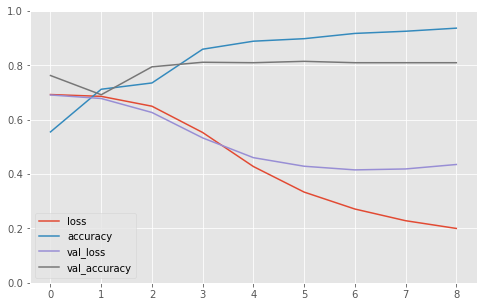

In [81]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

#### D.3.  Assess the fitness of the model and any measures taken to address overfitting.

Many different models were tried.  After starting with a basic model, layers and hyperparameters were added and tweaked.  Most ended up with overfitting. Improvements to the model may be possible with additional training data. (Testing and Debugging in Machine Learning!)

#### D>4.  Discuss the predictive accuracy of the trained network.

In [82]:
print(f'Test loss:{loss1}/ Test accuracy: {accuracy1}')

Test loss:0.42741408944129944/ Test accuracy: 0.8148148059844971


The predictive accuracy was 81% on the test data.

### Part V:  Summary and Recommendations

#### E.  Provide the code used to save the trained network within the neural network.

In [83]:
model.save('D213_Task_2.h5')

#### F.  Discuss the functionality of your neural network, including the impact of the network architecture.

The purpose of this analysis was to use 3000 labeled customer reviews to train a neural network model to predict sentiment.  The 4 layer sequential model has an acceptable predictive accuracy of  81%.

#### G.  Recommend a course of action based on your results.

Given the acceptable predictive accuracy, this model can be implemented to predict customer sentiment.  Would recommend continuing to update the model as more data is collected.

#### I.  List the web sources used to acquire data or segments of third-party code to support the application.

https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-toolshttps://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

https://wgu.udemy.com/course/text-analysis-and-natural-language-processing-with-python/learn/lecture/26436610#overview

https://github.com/Apress/natural-language-processing-recipes-2e/blob/main/Chapter%202.ipynb

https://stackoverflow.com/questions/47316783/python-dataframe-remove-duplicate-words-in-the-same-cell-within-a-column-in-pyt

https://investigate.ai/text-analysis/counting-words-with-scikit-learns-countvectorizer/

https://github.com/KierraDangerfield/Airline-Sentiment-Analysis/blob/main/Notebooks/2%20Sentiment%20Analysis%20EDA.ipynb

#### J.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

Baheti, Pragati. 2022. Activation Functions in Neural Networks.
https://www.v7labs.com/blog/neural-networks-activation-functions#:~:text=Sigmoid%20%2F%20Logistic%20Activation%20Function&text=It%20is%20commonly%20used%20for,choice%20because%20of%20its%20range.

Brownlee, Jason. 2018. Use Early Stopping to Halt the Training of Neural Networks At the Right Time.
https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

Chen,B. 2021. 7 popular activation functions you should know in Deep Learning and how to use them with Keras and TensorFlow 2.
https://towardsdatascience.com/7-popular-activation-functions-you-should-know-in-deep-learning-and-how-to-use-them-with-keras-and-27b4d838dfe6

Goldman, Sally. 2022.  Embeddings.
https://developers.google.com/machine-learning/crash-course/embeddings/video-lecture

Gupta, Ayush. 2022.  A Comprehensive Guide on Deep Learning Optimizers.
https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/#:~:text=The%20results%20of%20the%20Adam,for%20most%20of%20the%20applications.

Kalita, Debasish. 2022.  A Brief Overview of Recurrent Neural Networks (RNN).
https://www.analyticsvidhya.com/blog/2022/03/a-brief-overview-of-recurrent-neural-networks-rnn/

Karikari, Paul. 2020. Deep Learning LSTM for Sentiment Analysis in Tensorflow with Keras API.
https://medium.datadriveninvestor.com/deep-learning-lstm-for-sentiment-analysis-in-tensorflow-with-keras-api-92e62cde7626

Reddy,Dwarampudi. 2019. Effects of Padding on LSTM and CNNs.
https://arxiv.org/pdf/1903.07288.pdf

Shah, Neel. 2021. emot:3.1 library.
https://github.com/NeelShah18/emot

Sharma, Palash. 2021. Keras Tokenizer Tutorial with Examples for Beginners.
https://machinelearningknowledge.ai/keras-tokenizer-tutorial-with-examples-for-fit_on_texts-texts_to_sequences-texts_to_matrix-sequences_to_matrix/

Testing and Debugging in Machine Learning!
https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic

Virahonda,Sergio. 2020. An easy tutorial about Sentiment Analysis with Deep Learning and Keras.
https://towardsdatascience.com/an-easy-tutorial-about-sentiment-analysis-with-deep-learning-and-keras-2bf52b9cba91

### Part VI: Reporting

#### H.  Create your neural network using an industry-relevant interactive development environment (e.g., a Jupyter Notebook). Include a PDF or HTML document of your executed notebook presentation

A copy of the Jupyter Notebook is included in the submission.